In [1]:
pip install transformers


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install torch


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import torch

model = CLIPModel.from_pretrained("laion/CLIP-ViT-H-14-laion2B-s32B-b79K")
processor = CLIPProcessor.from_pretrained("laion/CLIP-ViT-H-14-laion2B-s32B-b79K")

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [4]:
ls /datasets/orbnode/database_images

0813f34b-e4e8-4eb1-a32a-d57615e32091-50_res.webp
0813f34b-e4e8-4eb1-a32a-d57615e32091-thumb_res.webp
0dfa5539-fab9-4544-a6d8-e6778d8a14a6-50_res.webp
0dfa5539-fab9-4544-a6d8-e6778d8a14a6-thumb_res.webp
120e04ae-c293-41b2-8873-7b7191346f8b-50_res.webp
120e04ae-c293-41b2-8873-7b7191346f8b-thumb_res.webp
319c3fc6-e873-4be7-abd3-69c371d906a5-50_res.webp
319c3fc6-e873-4be7-abd3-69c371d906a5-thumb_res.webp
5bebaf54-4ec5-4096-b9ea-946c6d314de8-50_res.webp
5bebaf54-4ec5-4096-b9ea-946c6d314de8-thumb_res.webp
6062ded1-b935-474d-b03b-cedb5c34819e-50_res.webp
6062ded1-b935-474d-b03b-cedb5c34819e-thumb_res.webp
930885f1-0367-4483-b57c-7fe268cdfe37-50_res.webp
930885f1-0367-4483-b57c-7fe268cdfe37-thumb_res.webp
947fcbd7-e2ac-496a-a02a-cd87a6e2162f-50_res.webp
947fcbd7-e2ac-496a-a02a-cd87a6e2162f-thumb_res.webp
95cd0053-7375-4615-b13c-0b6f93b53537-50_res.webp
95cd0053-7375-4615-b13c-0b6f93b53537-thumb_res.webp
9785af6a-1485-4575-84be-ae29d55837c5-50_res.webp
9785af6a-1485-4575-84be-ae29d55837c5-thumb

In [5]:
import os

In [6]:
image_a = '/datasets/orbnode/database_images/' + os.listdir('/datasets/orbnode/database_images/')[-3]

In [7]:
image_b = '/datasets/orbnode/database_images/' + os.listdir('/datasets/orbnode/database_images/')[-2]

In [8]:
#930885f1-0367-4483-b57c-7fe268cdfe37-50_res.webp
#319c3fc6-e873-4be7-abd3-69c371d906a5-50_res.webp

#0dfa5539-fab9-4544-a6d8-e6778d8a14a6-50_res.webp
#95cd0053-7375-4615-b13c-0b6f93b53537-50_res.webp
#5bebaf54-4ec5-4096-b9ea-946c6d314de8-50_res.webp

#f270bd26-7211-4c78-a5dc-85199119b8ff-50_res.webp
#e40c45d7-ca8e-4988-9970-4bf1066251ea-50_res.webp

#6062ded1-b935-474d-b03b-cedb5c34819e-50_res.webp
#120e04ae-c293-41b2-8873-7b7191346f8b-50_res.webp
#0813f34b-e4e8-4eb1-a32a-d57615e32091-50_res.webp
#d481ddb6-687b-4bec-b9be-b412ab854fcb-50_res.webp

image_a = Image.open("/datasets/orbnode/database_images/d481ddb6-687b-4bec-b9be-b412ab854fcb-50_res.webp")
# image_a = Image.open(image_a)
inputs_a = processor(images=image_a, return_tensors="pt")
embeddings_a = model.get_image_features(**inputs_a)

In [9]:
# Embedding models (like CLIP, DINO) require (H, W, 3) format (RGB).

# A (H, W) grayscale image will raise an error or give incorrect results if passed directly.

# img = Image.open("/datasets/image.png")
image_a_stacked = image_a.convert("RGB")

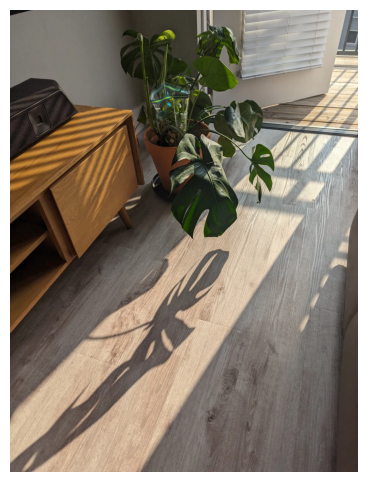

In [10]:
from IPython.display import display
# display(image_a)

import matplotlib.pyplot as plt
from PIL import Image

plt.figure(figsize=(6, 6))  # width, height in inches
plt.imshow(image_a_stacked)
plt.axis('off')
plt.show()

In [11]:
import numpy as np
np.array(image_a).shape

(4080, 3072, 3)

In [12]:
image_b = Image.open("/datasets/orbnode/database_images/0813f34b-e4e8-4eb1-a32a-d57615e32091-50_res.webp")
# image_b = Image.open(image_b)
inputs_b = processor(images=image_b, return_tensors="pt")
embeddings_b = model.get_image_features(**inputs_b)

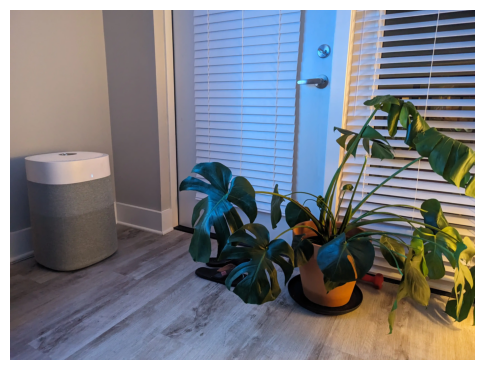

In [13]:
from IPython.display import display
# display(image_b)

import matplotlib.pyplot as plt
from PIL import Image

plt.figure(figsize=(6, 6))  # width, height in inches
plt.imshow(image_b)
plt.axis('off')
plt.show()

In [14]:
# import torch
import torch.nn.functional as F

# Normalize both embeddings to unit vectors
embeddings_a = F.normalize(embeddings_a, p=2, dim=1)
embeddings_b = F.normalize(embeddings_b, p=2, dim=1)

#### 1

In [15]:
cos_sim = torch.matmul(embeddings_a, embeddings_b.T)
print("Cosine similarity:", cos_sim.item())

Cosine similarity: 0.6797027587890625


#### Embedding data store

In [16]:
dataset_images = [path_image for path_image in os.listdir('/datasets/orbnode/database_images') if '50_res.webp' in path_image.split('-')]

In [17]:
print(dataset_images)

['120e04ae-c293-41b2-8873-7b7191346f8b-50_res.webp', '0813f34b-e4e8-4eb1-a32a-d57615e32091-50_res.webp', '95cd0053-7375-4615-b13c-0b6f93b53537-50_res.webp', '0dfa5539-fab9-4544-a6d8-e6778d8a14a6-50_res.webp', '6062ded1-b935-474d-b03b-cedb5c34819e-50_res.webp', '319c3fc6-e873-4be7-abd3-69c371d906a5-50_res.webp', 'd481ddb6-687b-4bec-b9be-b412ab854fcb-50_res.webp', 'bc27e178-a7ad-4a9b-a3b9-710ff41a71b3-50_res.webp', '9785af6a-1485-4575-84be-ae29d55837c5-50_res.webp', 'da9e9401-6fc3-4d5b-b032-e0490202d74a-50_res.webp', '930885f1-0367-4483-b57c-7fe268cdfe37-50_res.webp', 'add7e2ab-6cdb-423b-8dc1-d4e68528becb-50_res.webp', 'f270bd26-7211-4c78-a5dc-85199119b8ff-50_res.webp', 'e40c45d7-ca8e-4988-9970-4bf1066251ea-50_res.webp', '947fcbd7-e2ac-496a-a02a-cd87a6e2162f-50_res.webp', 'b1e2b11e-c008-4de9-967b-7bc0c21e75b3-50_res.webp', '5bebaf54-4ec5-4096-b9ea-946c6d314de8-50_res.webp', 'aa9f5ca1-5993-4f39-8dcb-2d02e81879cf-50_res.webp', 'e5e459ff-b762-4e7d-b6e7-3a03560c9293-50_res.webp']


In [18]:
embeddings_images = {}

for image in dataset_images:
    # print('/datasets/orbnode/database_images/'+image)
    image_pil = Image.open('/datasets/orbnode/database_images/'+image)
    processed_image = processor(images=image_pil, return_tensors="pt")
    embedding = model.get_image_features(**processed_image)
    embeddings_images.update({embedding:image_pil})

In [19]:
[embedding.shape for embedding in embeddings_images]

[torch.Size([1, 1024]),
 torch.Size([1, 1024]),
 torch.Size([1, 1024]),
 torch.Size([1, 1024]),
 torch.Size([1, 1024]),
 torch.Size([1, 1024]),
 torch.Size([1, 1024]),
 torch.Size([1, 1024]),
 torch.Size([1, 1024]),
 torch.Size([1, 1024]),
 torch.Size([1, 1024]),
 torch.Size([1, 1024]),
 torch.Size([1, 1024]),
 torch.Size([1, 1024]),
 torch.Size([1, 1024]),
 torch.Size([1, 1024]),
 torch.Size([1, 1024]),
 torch.Size([1, 1024]),
 torch.Size([1, 1024])]

In [26]:
list(embeddings_images.items())[0]

(tensor([[ 0.5870, -0.0712,  0.1576,  ..., -0.1758, -0.3377,  0.5096]],
        grad_fn=<MmBackward0>),
 <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=248x203>)

In [20]:
image_pil = Image.open("/datasets/orbnode/database_images/0813f34b-e4e8-4eb1-a32a-d57615e32091-50_res.webp")
processed_image = processor(images=image_pil, return_tensors="pt")
embedding_search_image = model.get_image_features(**processed_image)

In [34]:
embeddings_images.keys()

dict_keys([tensor([[ 0.5870, -0.0712,  0.1576,  ..., -0.1758, -0.3377,  0.5096]],
       grad_fn=<MmBackward0>), tensor([[ 0.0051,  0.8858,  0.7322,  ..., -0.7432,  0.4274,  0.1884]],
       grad_fn=<MmBackward0>), tensor([[ 0.2202,  0.1579,  0.4489,  ..., -1.0457,  0.5432, -0.1912]],
       grad_fn=<MmBackward0>), tensor([[ 0.2657,  1.7128, -0.7968,  ...,  0.2399, -0.0871, -0.6593]],
       grad_fn=<MmBackward0>), tensor([[ 0.8859,  0.5970, -0.7063,  ..., -0.3063, -0.2952, -0.3111]],
       grad_fn=<MmBackward0>), tensor([[ 0.7244,  1.3652, -0.8157,  ..., -0.3907,  0.1363, -0.0643]],
       grad_fn=<MmBackward0>), tensor([[ 0.3734,  0.7300,  0.0545,  ..., -0.3853,  0.0716,  0.2345]],
       grad_fn=<MmBackward0>), tensor([[ 0.3408,  0.0054,  0.2544,  ..., -0.5907,  0.4978,  0.2938]],
       grad_fn=<MmBackward0>), tensor([[ 0.2179,  0.4010, -0.0207,  ..., -0.6415,  0.8682, -0.5901]],
       grad_fn=<MmBackward0>), tensor([[ 0.0914,  0.8582, -0.1426,  ..., -0.1619,  0.2202, -0.2714]],


In [47]:
embeddings_a = F.normalize(embedding_search_image, p=2, dim=1)
embeddings_images_searchdb = {}

for embedding in embeddings_images:
    
    embeddings_b = F.normalize(embedding, p=2, dim=1)
    
    cos_sim = torch.matmul(embeddings_a, embeddings_b.T)
    embeddings_images_searchdb.update({cos_sim.item():embeddings_images.get(embedding)})
    print("Cosine similarity:", cos_sim.item())
    print()

Cosine similarity: 0.26543858647346497

Cosine similarity: 0.9999998807907104

Cosine similarity: 0.2978041172027588

Cosine similarity: 0.39821016788482666

Cosine similarity: 0.31712615489959717

Cosine similarity: 0.42532068490982056

Cosine similarity: 0.6797027587890625

Cosine similarity: 0.26357221603393555

Cosine similarity: 0.3544597923755646

Cosine similarity: 0.42318639159202576

Cosine similarity: 0.38781023025512695

Cosine similarity: 0.26303723454475403

Cosine similarity: 0.7497638463973999

Cosine similarity: 0.7639342546463013

Cosine similarity: 0.26357221603393555

Cosine similarity: 0.9999998807907104

Cosine similarity: 0.25007057189941406

Cosine similarity: 0.7639342546463013

Cosine similarity: 0.3766074478626251



In [48]:
embeddings_images_searchdb

{0.26543858647346497: <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=248x203>,
 0.9999998807907104: <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=4080x3072>,
 0.2978041172027588: <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=3036x4048>,
 0.39821016788482666: <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=3072x4080>,
 0.31712615489959717: <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=956x719>,
 0.42532068490982056: <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=3072x2904>,
 0.6797027587890625: <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=3072x4080>,
 0.26357221603393555: <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=3036x4048>,
 0.3544597923755646: <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=3072x4080>,
 0.42318639159202576: <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=3072x4080>,
 0.38781023025512695: <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=4080x3072>,
 0.26303723454475403: <PIL.We

In [53]:
embeddings_images_search_list = []
lowest = None
for score in embeddings_images_searchdb:
    if lowest == None:
        lowest = score
    elif lowest<score:
        embeddings_images_search_list.append((score,embeddings_images_searchdb.get(score)))
    elif lowest>score:
        current = embeddings_images_search_list.pop()
        embeddings_images_search_list.append((score,embeddings_images_searchdb.get(score)))
        embeddings_images_search_list.append(current)

for el in embeddings_images_search_list:
    print(el)

(0.9999998807907104, <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=4080x3072 at 0x7FD3F3A14EF0>)
(0.2978041172027588, <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=3036x4048 at 0x7FD3F39ABCB0>)
(0.39821016788482666, <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=3072x4080 at 0x7FD3F39CA150>)
(0.31712615489959717, <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=956x719 at 0x7FD3F39C87A0>)
(0.42532068490982056, <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=3072x2904 at 0x7FD3F39C9C10>)
(0.26357221603393555, <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=3036x4048 at 0x7FD3F39CA180>)
(0.6797027587890625, <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=3072x4080 at 0x7FD3F39C9010>)
(0.3544597923755646, <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=3072x4080 at 0x7FD3F39C99D0>)
(0.42318639159202576, <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=3072x4080 at 0x7FD3F39CA5A0>)
(0.26303723454475403, <PIL.WebPImagePlugin.

#### 2

In [22]:
# from sklearn.metrics.pairwise import cosine_similarity

# cos_sim_sklearn = cosine_similarity(embeddings_a.detach().numpy(), embeddings_b.detach().numpy())
# print("Cosine similarity (sklearn):", cos_sim_sklearn[0][0])

### 3

In [23]:
!pip install faiss

ERROR: Could not find a version that satisfies the requirement faiss (from versions: none)
ERROR: No matching distribution found for faiss

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [24]:
import faiss
import numpy as np

# Convert and normalize
emb_a_np = F.normalize(embeddings_a, p=2, dim=1).cpu().detach().numpy()
emb_b_np = F.normalize(embeddings_b, p=2, dim=1).cpu().detach().numpy()

# FAISS index (cosine similarity via inner product since vectors are normalized)
index = faiss.IndexFlatIP(emb_a_np.shape[1])
index.add(emb_b_np)  # Add target image embeddings

# Search top 1
D, I = index.search(emb_a_np, k=1)
print(f"FAISS cosine similarity: {D[0][0]:.4f}, Index: {I[0][0]}")

ModuleNotFoundError: No module named 'faiss'